In [1]:
# データフレーム用クラスをインポート
import pandas as pd

# 描画用ライブラリをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# サンプル分割用の関数をインポート
from sklearn.model_selection import train_test_split

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

# 勾配ブースティング決定木を行うためのモジュールをインポート
from sklearn.ensemble import GradientBoostingClassifier

# ランダムフォレストを行うためのモジュールをインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 線形回帰を行うためのモジュールをインポート
#from sklearn.linear_model import LinearRegression

# ロジスティック回帰を行うためのモジュールをインポート
#from sklearn.svm import SVC

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# 【追加！】アンダーサンプリングを行うためのモジュールをインポート
from imblearn.under_sampling import RandomUnderSampler

# 【追加！】カテゴリ変数をOneHotベクトル化するためのモジュールをインポート
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 【追加！】ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 算出用
from statistics import mean, median,variance,stdev

In [2]:
# CSVデータを読み込む
# 学習用データ（train.tsv)、評価用データ（test.tsv）
trainData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/105_kinoko/train.tsv", delimiter='\t')
testData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/105_kinoko/test.tsv", delimiter='\t')

In [3]:
# 概要を把握
trainData.describe()

,id
count,4062.000000
mean,4065.003939
std,2352.576107
min,0.000000
25%,2034.250000
50%,4047.500000
75%,6106.500000
max,8121.000000


In [4]:
# 欠損値の有無を把握
trainData.isnull().sum()

id                          0
Y                           0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
trainData.head()

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g


In [6]:
print(trainData.columns) # カラム名の確認

Index(['id', 'Y', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


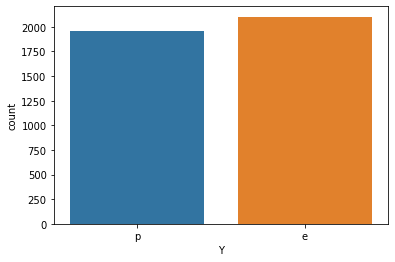

In [7]:
# 目的変数の分布状況を把握
sns.countplot(x='Y', data=trainData) # 毒キノコか否か（毒キノコ=p, 食用キノコ=e）

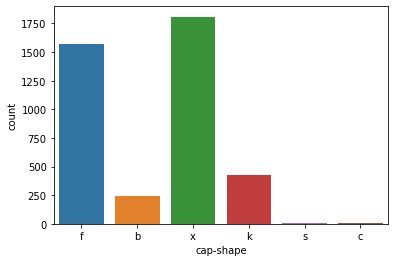

In [8]:
# 説明変数の分布状況を把握
sns.countplot(x='cap-shape', data=trainData)

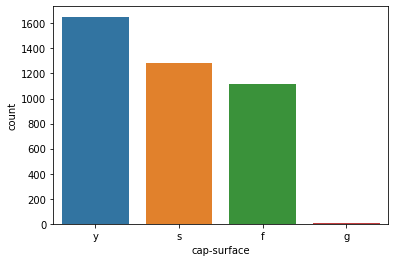

In [9]:
# 説明変数の分布状況を把握
sns.countplot(x='cap-surface', data=trainData)

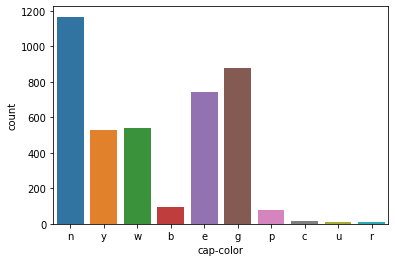

In [10]:
# 説明変数の分布状況を把握
sns.countplot(x='cap-color', data=trainData)

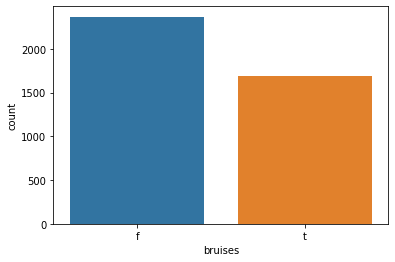

In [11]:
# 説明変数の分布状況を把握
sns.countplot(x='bruises', data=trainData)

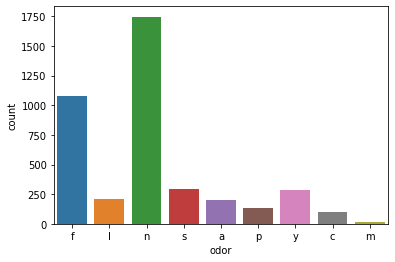

In [12]:
# 説明変数の分布状況を把握
sns.countplot(x='odor', data=trainData)

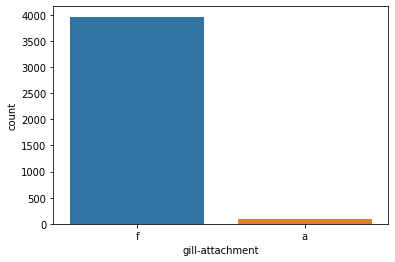

In [13]:
# 説明変数の分布状況を把握
sns.countplot(x='gill-attachment', data=trainData)

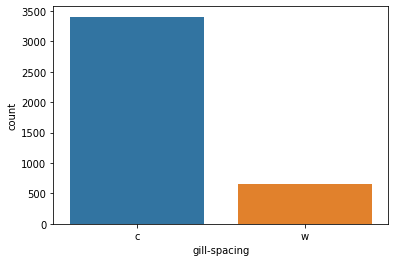

In [14]:
# 説明変数の分布状況を把握
sns.countplot(x='gill-spacing', data=trainData)

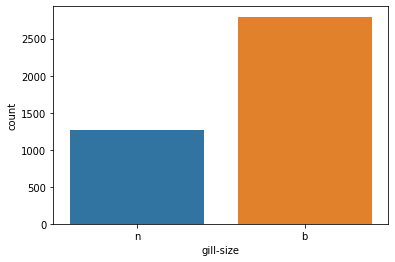

In [15]:
# 説明変数の分布状況を把握
sns.countplot(x='gill-size', data=trainData)

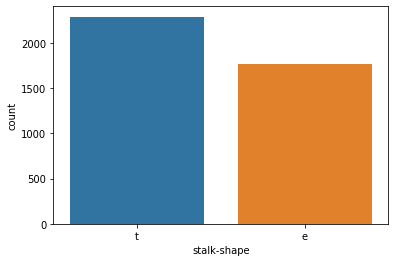

In [16]:
# 説明変数の分布状況を把握
sns.countplot(x='stalk-shape', data=trainData)

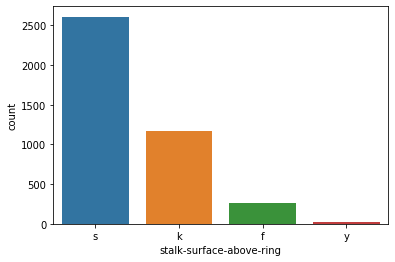

In [17]:
# 説明変数の分布状況を把握
sns.countplot(x='stalk-surface-above-ring', data=trainData)

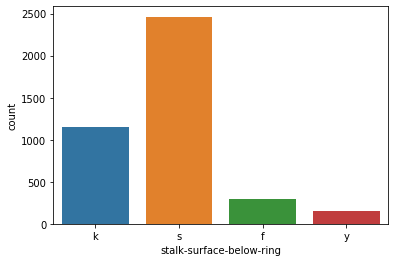

In [18]:
# 説明変数の分布状況を把握
sns.countplot(x='stalk-surface-below-ring', data=trainData)

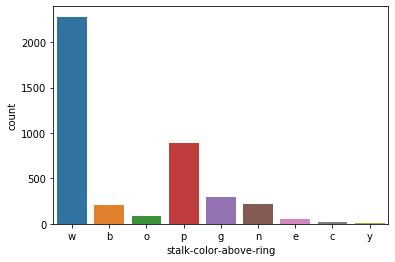

In [19]:
# 説明変数の分布状況を把握
sns.countplot(x='stalk-color-above-ring', data=trainData)

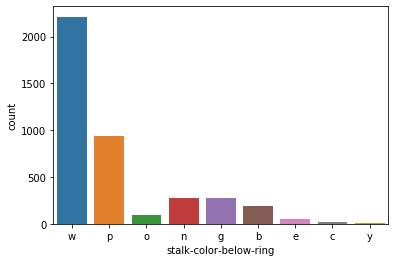

In [20]:
# 説明変数の分布状況を把握
sns.countplot(x='stalk-color-below-ring', data=trainData)

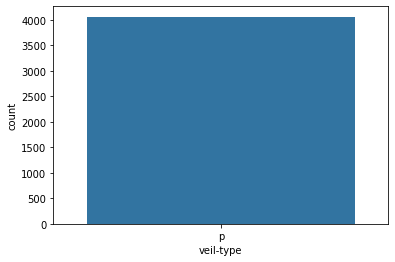

In [21]:
# 説明変数の分布状況を把握
sns.countplot(x='veil-type', data=trainData)

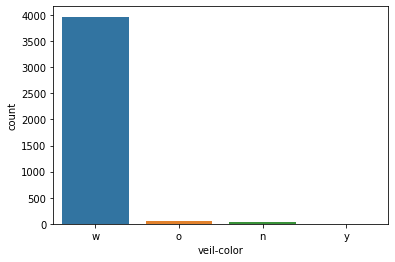

In [22]:
# 説明変数の分布状況を把握
sns.countplot(x='veil-color', data=trainData)

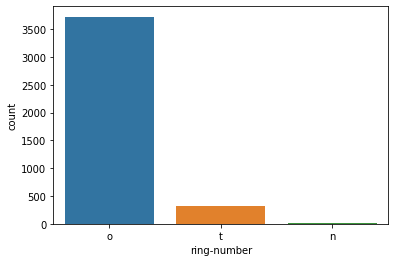

In [23]:
# 説明変数の分布状況を把握
sns.countplot(x='ring-number', data=trainData)

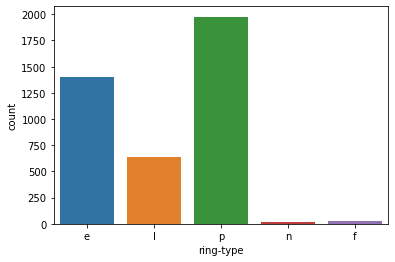

In [24]:
# 説明変数の分布状況を把握
sns.countplot(x='ring-type', data=trainData)

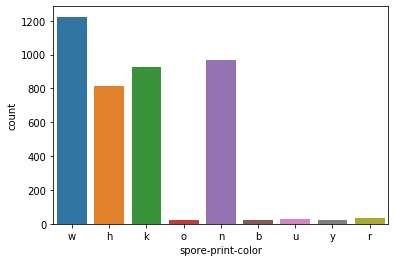

In [25]:
# 説明変数の分布状況を把握
sns.countplot(x='spore-print-color', data=trainData)

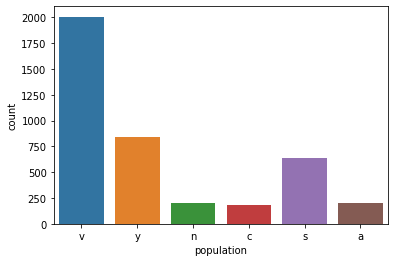

In [26]:
# 説明変数の分布状況を把握
sns.countplot(x='population', data=trainData)

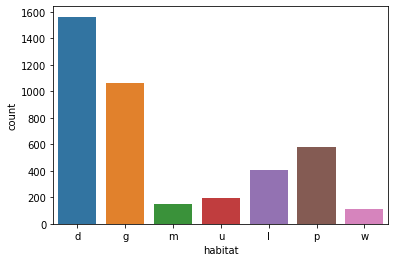

In [27]:
# 説明変数の分布状況を把握
sns.countplot(x='habitat', data=trainData)

In [28]:
# One-Hotベクトル化
FEATURE_NAMES = [
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]
tmpTrainData = pd.get_dummies(trainData, columns=FEATURE_NAMES)
tmpTrainData.head()

,id,Y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,p,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,2,p,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,e,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,p,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,7,p,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [29]:
tmpTrainData["Y"] = tmpTrainData.apply(lambda x: 1 if x["Y"] == "p" else 0, axis=1)
tmpTrainData.head()

,id,Y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,2,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,7,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [49]:
# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
#feature_names=["pclass_1","pclass_2","pclass_3","sex_val","sibsp","parch_0","parch_1","parch_2","parch_3","parch_4","parch_5","fare","embarked_S","embarked_C","embarked_Q"]
#data=trainData[feature_names]
TARGET_NAME = "Y"
data=tmpTrainData.drop(TARGET_NAME, axis=1)
target=tmpTrainData[TARGET_NAME]
(X_train, X_test ,y_train, y_test) = train_test_split(data, target, test_size = 0.3)
print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)

(2843, 118) (1219, 118) (2843,) (1219,)


In [31]:
# アンダーサンプリングを行う

# 正例の数を保存
#positive_count_train = y_train.sum()

# 正例が11.1％になるまで負例をダウンサンプリング
#rus = RandomUnderSampler(ratio={0:positive_count_train*8, 1:positive_count_train})
# 正例が10％になるまで負例をダウンサンプリング
#rus = RandomUnderSampler(ratio={0:positive_count_train*9, 1:positive_count_train})

# 学習用データに反映
#X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

X_train_resampled = X_train
y_train_resampled = y_train

In [99]:
# 決定木モデルを構築
clf = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=50,
    min_samples_split=15, # 総サンプル数の0.5~1%
    n_estimators=140,
    random_state=50,
    subsample=0.8,
)
#clf.fit(X_train, y_train)
clf.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='auto',
                           random_state=50, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

([<matplotlib.axis.YTick at 0x28df6b0bc18>,
 <a list of 22 Text yticklabel objects>)

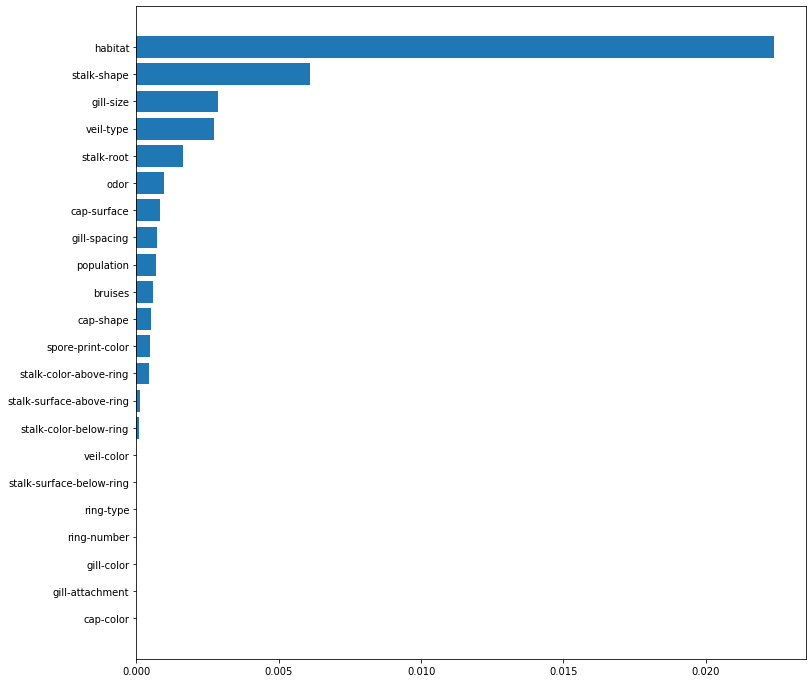

In [100]:
# 変数の重要度を可視化する

values, names = zip(*sorted(zip(clf.feature_importances_, FEATURE_NAMES)))
plt.figure(figsize=(12,12))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names)

In [101]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

1.0


,predict(0),predict(1)
target(0),1482,0
target(1),0,1361


In [102]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

1.0


,predict(0),predict(1)
target(0),621,0
target(1),0,598


[0 1 0 ... 0 1 1]
AUC(train): 1.0
AUC(test): 1.0
AUC ratio(train/test): 1.0


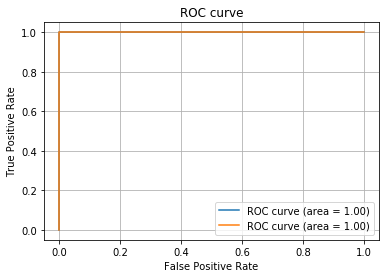

In [103]:
# 【追加！】精度検証を行う②

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict(X_train)
print(y_train_predict)
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))

In [104]:
# 精度検証①
# 予測値を計算
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
# 平均二乗誤差（MSE）の計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 0.000, test : 0.000
R2 train : 1.000, test : 1.000


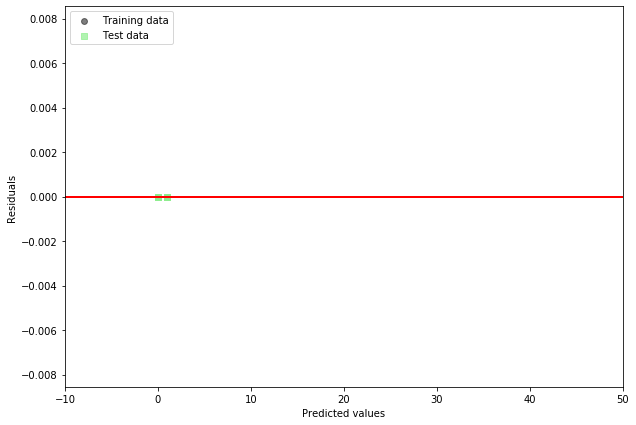

In [105]:
# 精度検証②
# 残差プロットを可視化
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

In [106]:
# 検証実施
# 説明変数の値を加工
tmpTestData = pd.get_dummies(testData, columns=FEATURE_NAMES)
tmpTestData.head()

,id,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,4,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,6,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,8,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,9,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [107]:
# モデルからを目的変数データを算出
y_test = clf.predict(tmpTestData)
result = tmpTestData[["id"]]
result["Y_val"] = y_test
result["Y"] = result.apply(lambda x: "p" if x["Y_val"] == 1 else "e", axis=1)
result.head()

C:\Users\tamot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tamot\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,Y_val,Y
0,1,1,p
1,4,0,e
2,6,0,e
3,8,1,p
4,9,1,p


In [108]:
result = result.drop("Y_val", axis=1)
result.head()

,id,Y
0,1,p
1,4,e
2,6,e
3,8,p
4,9,p


In [109]:
# 結果をCSV出力
# export csv
result.to_csv(path_or_buf='C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/105_kinoko/y_test_20200222.csv', sep=',', header=False, index=False, encoding='utf8')